<a href="https://colab.research.google.com/github/likhithaj21/Cyclone-prediction-and-alert-system/blob/main/Copy_of_Cyclone_prediction_and_alerting_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🔎 Data Preview:
   YEAR  MONTH   LAT   LONG  WIND_KTS  PRESSURE CAT
0  1957      8  22.5 -140.0        50         0  TS
1  1961     10  22.1 -140.2        45         0  TS
2  1962      8  18.0 -140.0        45         0  TS
3  1967      7  16.6 -139.5        45         0  TS
4  1972      8  18.5 -139.8        70         0  H1

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59228 entries, 0 to 59227
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   YEAR      59228 non-null  int64  
 1   MONTH     59228 non-null  int64  
 2   LAT       59228 non-null  float64
 3   LONG      59228 non-null  float64
 4   WIND_KTS  59228 non-null  int64  
 5   PRESSURE  59228 non-null  int64  
 6   CAT       59228 non-null  object 
dtypes: float64(2), int64(4), object(1)
memory usage: 3.2+ MB
None

 Statistical Summary:
               YEAR         MONTH           LAT          LONG      WIND_KTS  \
count  59228.000000  59228.

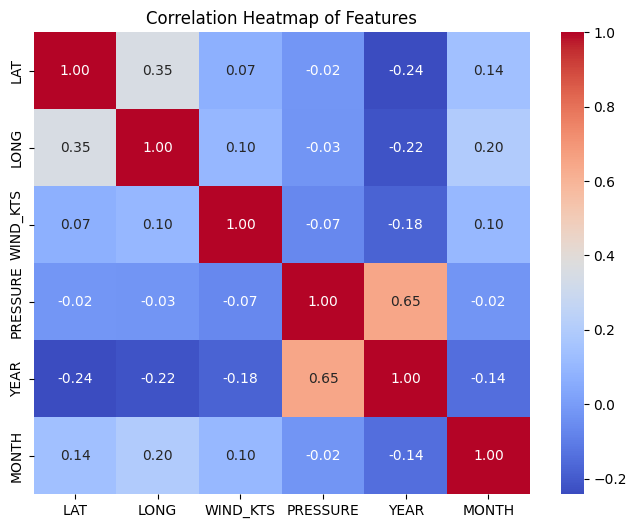

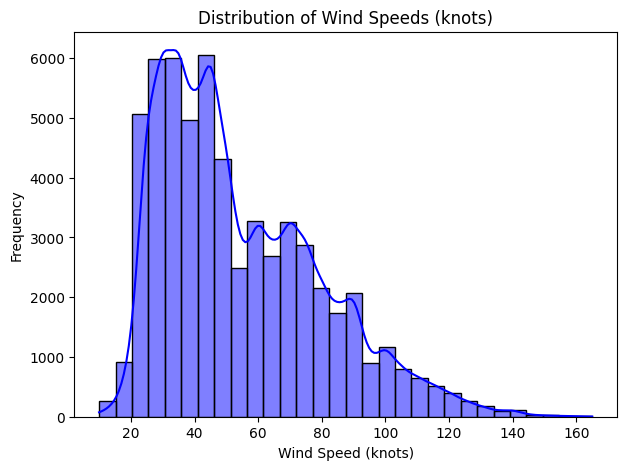

/tmp/ipython-input-163756815.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CAT", y="WIND_KTS", data=data, palette="Set2")


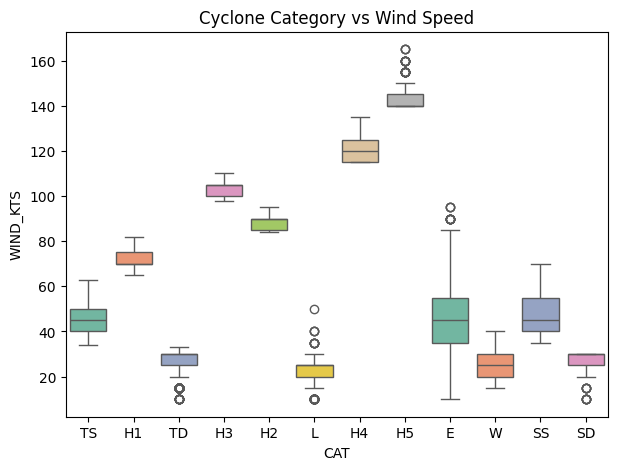

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

#Load Data
data = pd.read_csv("Historical_Tropical_Storm_Tracks.csv")

#Clean Columns
data.columns = data.columns.str.strip()

#Drop unnecessary columns
drop_cols = ["index", "FID", "AD_TIME", "BTID", "NAME", "BASIN", "Shape_Leng", "DAY"]
data = data.drop(columns=drop_cols, errors="ignore")

#Handle missing values
data = data.dropna(subset=["CAT", "LAT", "LONG", "WIND_KTS", "PRESSURE"])

#First few rows
print("\n Data Preview:")
print(data.head())

#Data info
print("\n Dataset Info:")
print(data.info())

#Statistical summary
print("\n Statistical Summary:")
print(data.describe())

#Category distribution
print("\n Storm Category Counts:")
print(data["CAT"].value_counts())

#Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[["LAT", "LONG", "WIND_KTS", "PRESSURE", "YEAR", "MONTH"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

#Distribution of wind speeds
plt.figure(figsize=(7, 5))
sns.histplot(data["WIND_KTS"], bins=30, kde=True, color="blue")
plt.title("Distribution of Wind Speeds (knots)")
plt.xlabel("Wind Speed (knots)")
plt.ylabel("Frequency")
plt.show()

#Category vs Wind Speed
plt.figure(figsize=(7, 5))
sns.boxplot(x="CAT", y="WIND_KTS", data=data, palette="Set2")
plt.title("Cyclone Category vs Wind Speed")
plt.show()


#Encoding target (to find storm category)
data["CAT"] = data["CAT"].astype("category")
data["CAT_code"] = data["CAT"].cat.codes  # numeric labels

#Defining Features & Target
features = ["LAT", "LONG", "WIND_KTS", "PRESSURE", "YEAR", "MONTH"]
X = data[features]
y = data["CAT_code"]



I first loaded essential libraries numpy, pandas for data handling, matplotlib, seaborn for plotting/visualizations,sklearn to use ML tools (splitting, model training, evaluation) in the project and then imported pickle to save/load model